# Demonstrate Linear Ballistic Accumulator model

The LBA model can be used to simulate responses with any number of options. Given a few parameters, the LBA model will define the probability of observing different outcomes.

## Define LBA probability density function

The PDF for LBA defines the probability density for each possible response time. It varies depending on the parameters of the model.

In [1]:
import os
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
from psireact import lba

In [2]:
# define a model object for LBA
model_lba = lba.LBA()

# get the probability density function
f = model_lba.function_pdf()

In [3]:
# set times and responses to evaluate
n = 100  # number of times
m = 2  # number of choices
k = 3  # number of parameter values to test
t = np.tile(np.linspace(0, 10, n), 2)
r = np.repeat(range(m), n).astype('int32')
demo = np.repeat(range(3), n * m)
df = pd.DataFrame({'rt': np.tile(t, k), 'response': np.tile(r, k),
                   'demo': demo, 'pdf': np.zeros(n * m * k)})

## Vary drift rate

Each choice $i$ is associated with a mean drift rate $v_i$. The rate of different accumulators determines both response probabilities and response times. We can visualize both by plotting "defective" response time distributions that are scaled by the probability of a given response. The blue line is response 1, and the orange line is response 2.

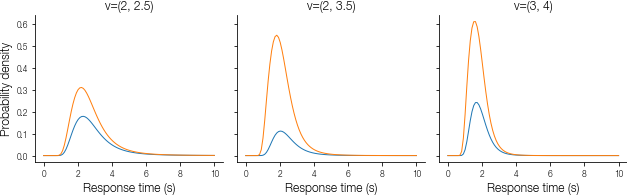

In [4]:
A = 5
b = 10
s = 1
tau = 0
for i, v in enumerate([[2, 2.5], [2, 3.5], [3, 4]]):
    df.loc[demo == i, 'pdf'] = f(t, r, A, b, v, s, tau)
    df.loc[demo == i, 'demo'] = f'v=({v[0]}, {v[1]})'

g = sns.FacetGrid(df, col='demo', hue='response')
g = (g.map_dataframe(sns.lineplot, x='rt', y='pdf')
      .set_titles('{col_name}')
      .set_xlabels('Response time (s)')
      .set_ylabels('Probability density'))

## Vary threshold

An accumulator must reach the threshold $b$ to trigger a response.

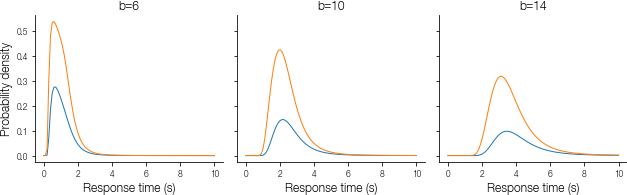

In [5]:
A = 5
v = [2, 3]
s = 1
tau = 0
for i, b in enumerate([6, 10, 14]):
    df.loc[demo == i, 'pdf'] = f(t, r, A, b, v, s, tau)
    df.loc[demo == i, 'demo'] = f'b={b}'

g = sns.FacetGrid(df, col='demo', hue='response')
g = (g.map_dataframe(sns.lineplot, x='rt', y='pdf')
      .set_titles('{col_name}')
      .set_xlabels('Response time (s)')
      .set_ylabels('Probability density'))

## Vary starting point range

Each accumulator starts in the range $[0, A]$ on each trial.

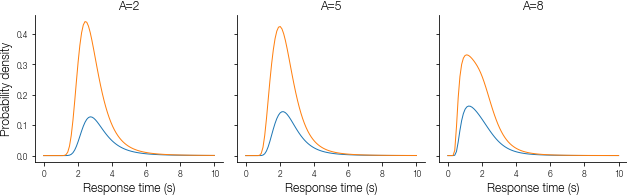

In [6]:
b = 10
v = [2, 3]
s = 1
tau = 0
for i, A in enumerate([2, 5, 8]):
    df.loc[demo == i, 'pdf'] = f(t, r, A, b, v, s, tau)
    df.loc[demo == i, 'demo'] = f'A={A}'

g = sns.FacetGrid(df, col='demo', hue='response')
g = (g.map_dataframe(sns.lineplot, x='rt', y='pdf')
      .set_titles('{col_name}')
      .set_xlabels('Response time (s)')
      .set_ylabels('Probability density'))

## Vary non-decision time

A non-decision time parameter $\tau$ controls how much time is taken by other processes, for example perception and response initiation.

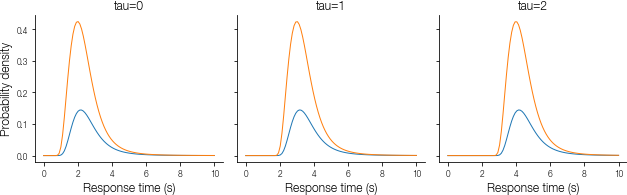

In [7]:
A = 5
b = 10
v = [2, 3]
s = 1
for i, tau in enumerate([0, 1, 2]):
    df.loc[demo == i, 'pdf'] = f(t, r, A, b, v, s, tau)
    df.loc[demo == i, 'demo'] = f'tau={tau}'

g = sns.FacetGrid(df, col='demo', hue='response')
g = (g.map_dataframe(sns.lineplot, x='rt', y='pdf')
      .set_titles('{col_name}')
      .set_xlabels('Response time (s)')
      .set_ylabels('Probability density'))